<h2> <strong> <span style="color: lightgreen"> Polars vs Pandas 🐼
</span> 
</strong>
</h2>


- **Linkedin Jobs and Skills:**
  - Pata comparar el rendimiento de las paqueterias Pandas y Polars se utiliza el data set de empleos de Linkedin que tiene una dimensión de 1,348,454  filas y 14 columnas.
  - Sitio web: [Kaggle]( https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024)







* <h3> <strong> <span style="color: darkgreen"> Carga de datos CSV
</strong>
</h4>

In [1]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading 
path_data_link = fr'C:\Users\diego.0661471\OneDrive - Confie\Documents\Pro_CDRCvsCL\Data\linkedin_job_postings.csv'
df_pd_read = pd.read_csv(path_data_link)
df_pl_read = pl.read_csv(path_data_link)

In [2]:
#Reading performance
pd_time_read_csv = %timeit -n10 -r1 -o df_pd_read_csv= pd.read_csv(path_data_link)
pl_time_read_csv = %timeit -n10 -r1 -o df_pl_read_csv = pl.read_csv(path_data_link)

10.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
1.76 s ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [3]:
#Function to plot 
def bar_plot(pl_time, pd_time):
    data = {'Library': ['Polars', 'Pandas'],
            'Average Time (seconds)': [pl_time, pd_time]} 
    df = pd.DataFrame(data)
    plt.figure(figsize=(8, 6))
    custom_palette = ["royalblue", "darkgrey"] 
    sns.set(style="whitegrid")
    ax = sns.barplot(x='Library', y='Average Time (seconds)', data=df, palette= custom_palette)
    ax.set_title('Average Time of execution')
    ax.set_xlabel('Library')
    ax.set_ylabel('Average Time (seconds)')
    
    # Annotate bars with values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.show()

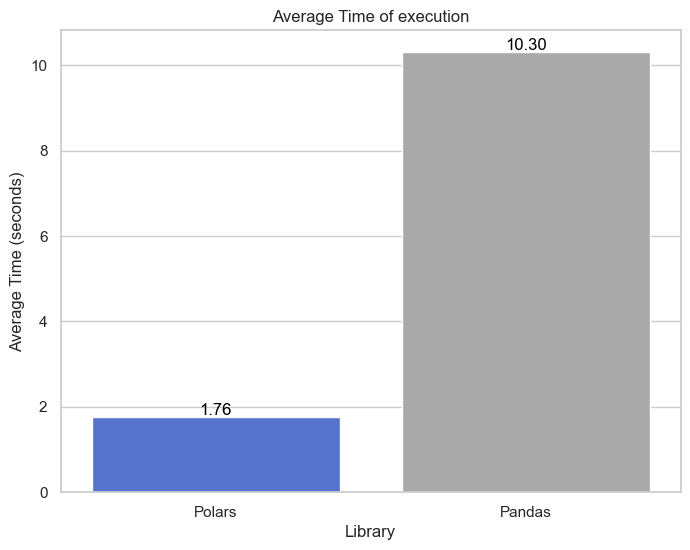

In [4]:
bar_plot(pl_time_read_csv.average, pd_time_read_csv.average)

* <h3> <strong> <span style="color: orange"> Filtros
</strong>
</h4>

In [5]:
#Filter performing
pd_time_filter = %timeit -n10 -r1 -o df_pd_read.query('job_type == "Remote"')
pl_time_filter = %timeit -n10 -r1 -o df_pl_read.filter(pl.col('job_type') == 'Remote')

124 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
41.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


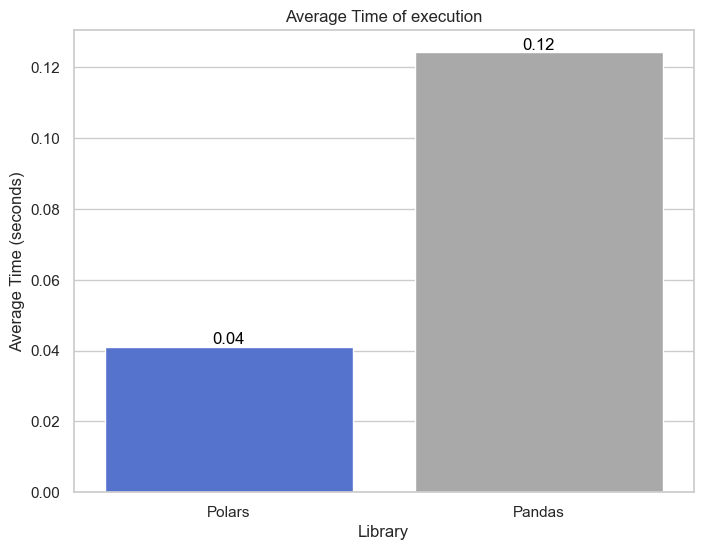

In [6]:
bar_plot(pl_time_filter.average, pd_time_filter.average)

* <h3> <strong> <span style="color: orange"> Creación de nuevas variables
</strong>
</h4>

In [7]:
#Polars
df_pl_read = df_pl_read.with_columns(pl.when(pl.col('search_country') == 'United States')
                                     .then('Yes')
                                     .otherwise('No')
                                     .alias('In USA'))
#Pandas
df_pd_read['In USA'] = pd.np.where(df_pd_read['search_country'] == "United States" , 'Yes', 'No')

C:\Users\diego.0661471\AppData\Local\Temp\ipykernel_38556\3520594998.py:3: DeprecationWarning: in a future version, string input will be parsed as a column name rather than a string literal. To silence this warning, pass the input as an expression instead: `pl.lit('Yes')`
  .then('Yes')
C:\Users\diego.0661471\AppData\Local\Temp\ipykernel_38556\3520594998.py:4: DeprecationWarning: in a future version, string input will be parsed as a column name rather than a string literal. To silence this warning, pass the input as an expression instead: `pl.lit('No')`
  .otherwise('No')
C:\Users\diego.0661471\AppData\Local\Temp\ipykernel_38556\3520594998.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_pd_read['In USA'] = pd.np.where(df_pd_read['search_country'] == "United States" , 'Yes', 'No')


In [8]:
#Creating new features
pl_new_var = %timeit -n10 -r1 -o df_pl_new_var = df_pl_read.with_columns(pl.when(pl.col('search_country') == 'United States').then('Yes').otherwise('No').alias('In USA'))
pd_new_var = %timeit -n10 -r1 -o df_pd_read['In USA'] = pd.np.where(df_pd_read['search_country'] == "United States" , 'Yes', 'No')

<magic-timeit>:1: DeprecationWarning: in a future version, string input will be parsed as a column name rather than a string literal. To silence this warning, pass the input as an expression instead: `pl.lit('Yes')`
<magic-timeit>:1: DeprecationWarning: in a future version, string input will be parsed as a column name rather than a string literal. To silence this warning, pass the input as an expression instead: `pl.lit('No')`


85.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


<magic-timeit>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.


346 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


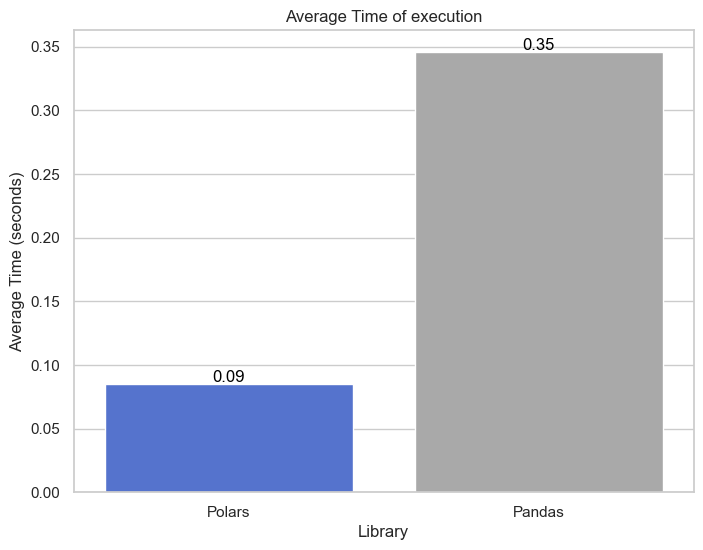

In [9]:
bar_plot(pl_new_var.average, pd_new_var.average)

* <h3> <strong> <span style="color: orange"> Agrupamiento y funciones de agregación 
</strong>
</h4>

In [10]:
#Polars
df_grouped_pl = df_pl_read.groupby('job_level').agg(pl.count('job_level').alias('count_job_level'))
#Pandas
df_grouped_pd = df_pd_read.groupby('job_level').agg(count_job_level = ('job_level', 'count'))

C:\Users\diego.0661471\AppData\Local\Temp\ipykernel_38556\1399631349.py:2: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  df_grouped_pl = df_pl_read.groupby('job_level').agg(pl.count('job_level').alias('count_job_level'))


<magic-timeit>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.


124 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
137 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


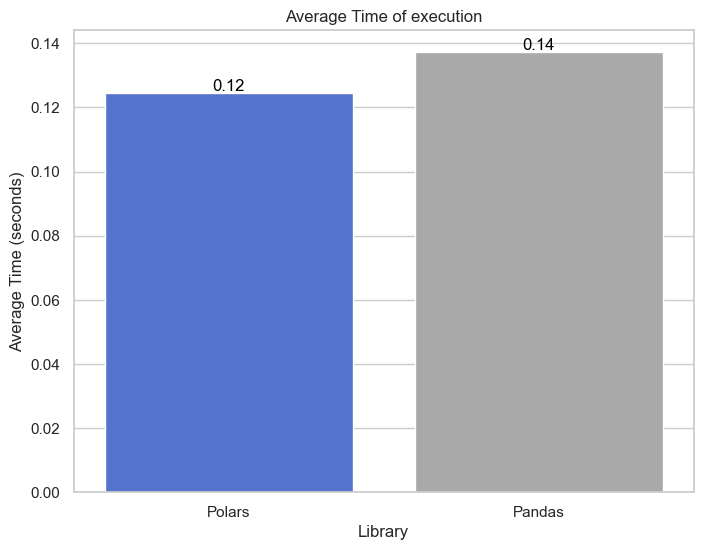

In [12]:
#Grouping and agregation
pl_groupby = %timeit -n10 -r1 -o df_grouped_pl = df_pl_read.groupby('job_level').agg(pl.count('job_level').alias('count_job_level'))
pd_groupby = %timeit -n10 -r1 -o df_pd_read.groupby('job_level').agg(count_job_level = ('job_level', 'count'))
#Plot
bar_plot(pl_groupby.average, pd_groupby.average)